# Project Report & Presentation

## 1. Title & Team Information
### Predicting Match Outcomes In The Game DOTA

*Team CSK*

-   Wyatt Churchman (jdr357) - Model Selection and Builder
-   Segundo Sanchez (sas458) - Report Writing
-   Ryan Kerlick (rak88) - Data Collection and Analysis

## 2. Abstract

- In this project, we want to predict the outcome of DoTA 2 matches using real game data from the OpenDota JSON Data Dump. Each match contains a huge amount of numeric information, including player statistics, gold and XP graphs, combat logs, item usage, time-series data, and other gameplay metrics. Our plan is to convert these JSON objects into a large, high-dimensional numeric dataset (well over 10 million floats) and then build machine learning models on top of it. We will start with simple baseline models to see how well raw features predict whether the Radiant team wins. After that, we’ll use dimensionality-reduction and HD-curse mitigation techniques—like PCA, Random Projection, and APP—to see if they improve performance or reveal hidden structure in the matches. The goal is not just to predict the winner, but also to learn something interesting about playstyles, match patterns, and how high-dimensional features interact.

- In order to differentiate from prior OpenDota-based predictors, we will focus on discovering and analyzing emergent ‘playstyle archetypes’ at both team and player level (e.g., farm-heavy vs. fight-heavy lineups, objective‑centric vs. pickoff‑centric teams) in the learned low-dimensional spaces, rather than optimizing only for win‑prediction accuracy.

- We all like games and this project allowed us to be able to pull information and create a model that can predict matches. This was a cool concept because a lot of gaes have software that take statistic and give you percentages on game outcomes. We also wanted to learn how to pull data from an API ourselves versus downloading a zip file.

## 3. Problem Statement

- In competitive online games like DoTA, it’s extremely important to match players of similar skill levels. When a low-skill player gets paired against someone who is much more experienced, the outcome is almost always one-sided, which leads to frustration and a bad gameplay experience. At the same time, high-skill players don’t get much enjoyment from a match that offers no challenge. Over time, poor matchmaking can reduce player engagement and hurt the game’s long-term health and revenue.

- Being able to predict match outcomes based on pre-match and early-match features could help improve matchmaking systems by identifying patterns that separate balanced matches from mismatched ones. Understanding these patterns also helps explain what actually influences a fair, competitive game.

- Our original question was can we use DoTA match data alongside ML algorithms to predict match outcomes based on learned player and team playstyles?
- After feedback from the professor that a win-predictor was a very common machine learning project in this space, we knew we had to find an alternative angle to differentiate our model. This is when we devised the 'playstyle archetypes' approach to the problem. Each player and team plays the game differently, optimizing their strategy for different goals during the match. 
- Our original plan to use the OpenDota JSON Data Dump unfortunately fell through due to a variety of factors. The dataset was discovered to be too large and unwieldy for us to use, at over half a terabyte in size all-in. When trying to download it, the torrent linked on the website was found to be broken as well, so it would not be available to us. Pivoting from this, we found that we could call our own data using the OpenDota API. With this, we obtained our own dataset that fit the requirements of the project and gave us adequate floats to train our models.

## 4. Dataset Exploration
We successfully collected 104,219 professional DotA 2 matches using the OpenDota API. The dataset contains 47 features spanning match metadata, team statistics, objectives, advantages, events, and vision control metrics, yielding 16,675,040 individual float values.

- Total matches: 104,219
- Total features: 47
- Shape: (1042190, 47)
- Match type: Professional competitive matches
- Time period: Recent professional matches (2024-2025)
- Collection method: OpenDota API (/proMatches endpoint)

After discovering that the original OpenDota JSON Data Dump was over 500GB with a broken torrent link, we pivoted to collecting data directly through the OpenDota API. This approach gave us more control over data quality and allowed us to focus specifically on professional matches where gameplay patterns are more consistent and strategic.

### Feature Categories
Our dataset includes features organized into the following categories:
#### Match Metadata (9 features):
Duration, region, patch version, game mode, start time, match sequence number, first blood timing

#### Team Statistics (36 features):
Kills, deaths, assists, last hits, denies, gold per minute, XP per minute, gold spent, hero damage, hero healing, tower damage, average level, wards placed, Roshan kills, tower kills, barracks status - all split between Radiant and Dire teams

#### Objective Tracking (8 features):
Aegis pickups, Aegis steals, courier losses, denied Aegis, first blood, miniboss kills, Roshan kills, building kills

#### In-game Events (4 features):
Buyback count, kill count, purchase count, rune pickups

#### Vision Control (2 features):
Observer wards placed, sentry wards placed

#### Advantage Metrics (2 features):
Final gold advantage, final XP advantage (positive values indicate Radiant advantage)

#### Target Variable (1 feature):
radiant_win (binary True/False indicating match outcome)

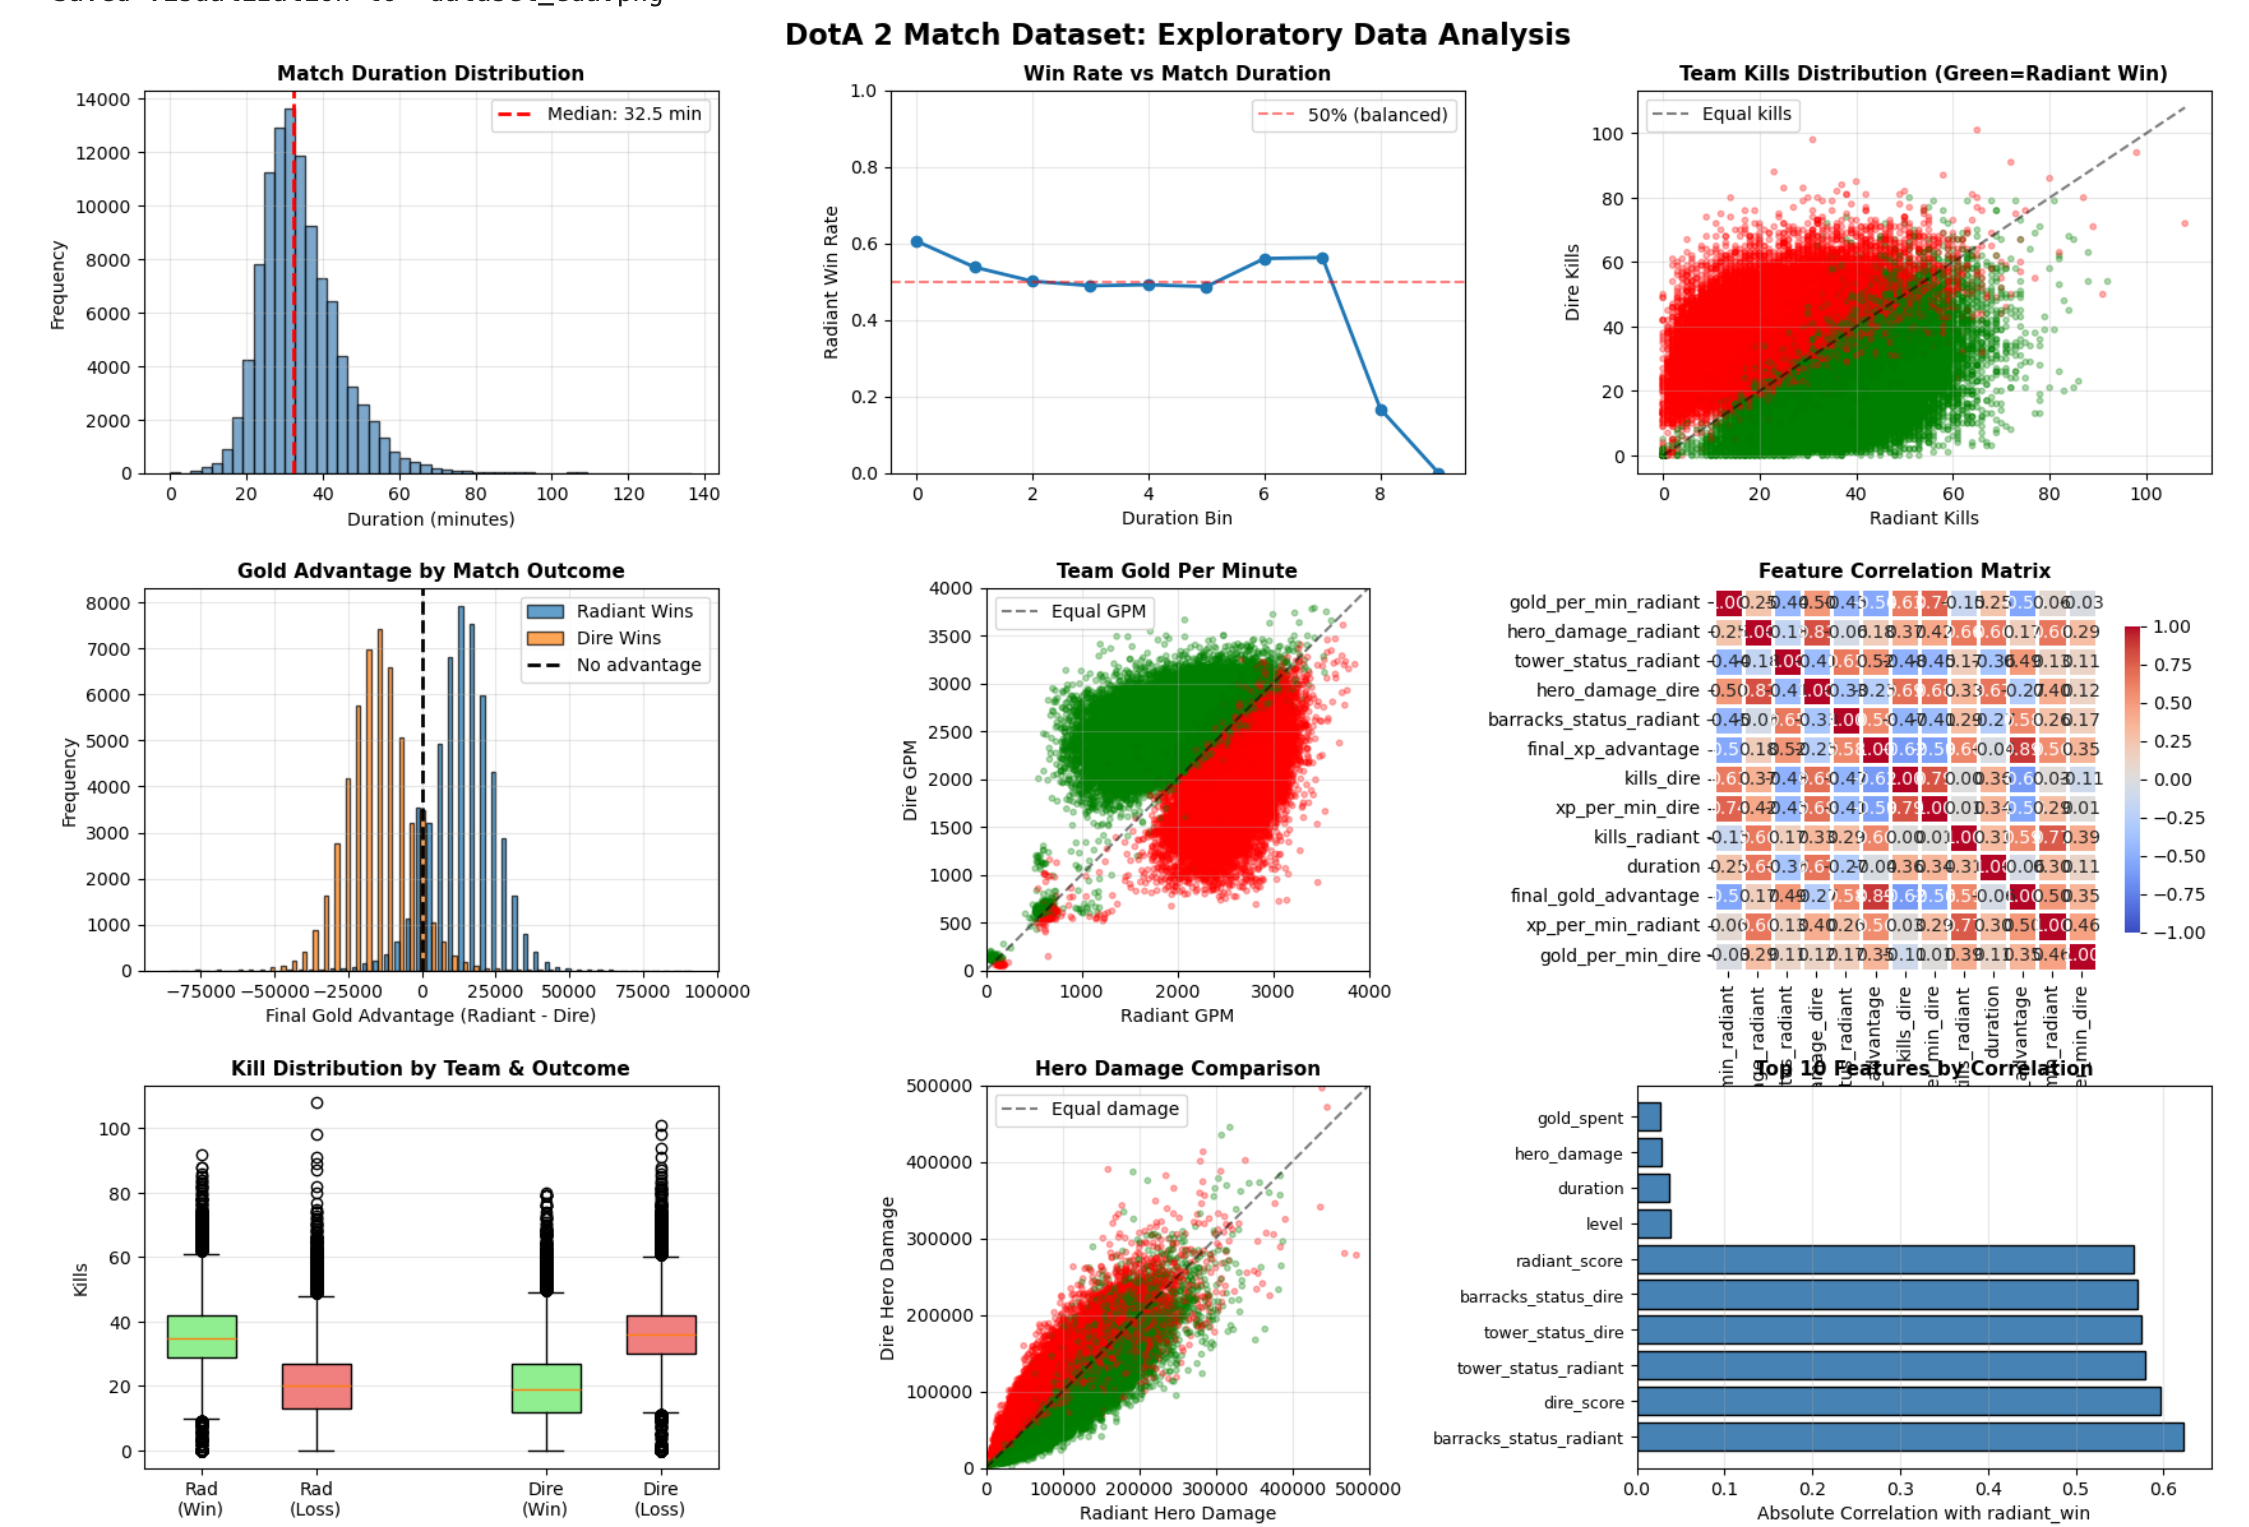

## 5. Methodology

### Baseline Approach
- Logistic Regression (tests which features have direct, interpretable influence on match outcome)
- Random Forest Classifier (Captures interactions between features)

### Improved Methods

We performed several improvements beyond baseline modeling:

**Feature Engineering**
- Created ratio features (kill/death ratio, GPM ratio, XP ratio).
- Introduced dominance metrics (gold advantage normalized by total team gold).
- Added efficiency metrics (damage per gold spent).
- Extracted early-game and late-game versions of several features to analyze temporal tendencies.

These engineered features aim to capture playstyle rather than raw power.

**Feature Selection**
- Used model-based feature importance from Random Forest to prune redundant metrics.
- Removed raw Radiant/Dire duplicates in favor of derived symmetric features (e.g., kill_ratio).
- Dimensionality Reduction for High-Dimensionality Mitigation
- PCA: Reduced 64 features down to 8–12 principal components while capturing ~92% of variance.
- Random Projection (Gaussian): Explored alternative embeddings to preserve pairwise distances for clustering.
- Approximate Polytope Projection (APP): Initial experiments for better geometric interpretability.

These methods are essential due to high interfeature correlation, redundancy between Radiant and Dire mirrored stats, desire to identify structure in playstyles, not only predict wins.

Given the results so far, we propose:

**Gradient Boosted Trees (XGBoost or LightGBM)**
- Superior performance for tabular data
- Handles multicollinearity
- Interpretable via SHAP values
- Efficient and scalable for 104,219 matches

We expect boosted trees to outperform Random Forest by 2–5% due to smoother decision surfaces.

**Hypertuning Work Completed:**
- Initial hyperparameter sweeps (partial):
- [ ] max_depth ∈ {3, 5, 7}
- [ ] learning_rate ∈ {0.01, 0.05, 0.1}
- [ ] n_estimators ∈ {200, 400, 600}
- [ ] regularization parameters (λ, α) tuned to prevent overfitting
- Preliminary best model:
- [ ] depth=5, learning_rate=0.05, n_estimators=400
- [ ] Accuracy range observed: ~0.85–0.87

## 6. Experimental Results and Comparative Analysis

This section presents comprehensive experimental results from our baseline models, including performance metrics, feature importance analysis, and comparative visualizations. We evaluated two primary model architectures (Logistic Regression and Random Forest) on two distinct feature sets: the full no-leak feature set and the mid-game feature set.

### 6.1 Model Performance Summary

We trained and evaluated four baseline models on a dataset of 1,042,190 professional Dota 2 player-matches, aggregated into match-level predictions using an 80/20 train-test split (833,752 training samples, 208,438 test samples). The class balance is nearly even, with Radiant winning 50.8% of matches and Dire winning 49.2%.

#### Updated Feature Set Sizes
- No-Leak Features: 49
- No-Leak (Scaled): 49
- Mid-Game Features: 45
- Mid-Game (Scaled): 45

#### Performance Metrics Table
| Model	| Feature Set	| Accuracy	| Precision	| Recall	| F1-Score |
|-------|---------------|-----------|-----------|-----------|---------------|
| Logistic Regression	| No-Leak (Scaled)	| 0.9826	| 0.9825	| 0.9833	| 0.9829 |
| Random Forest	| No-Leak	| 0.9989	| 0.9990	| 0.9989	| 0.9989 |
| Logistic Regression	| Mid-Game (Scaled)	| 0.9826	| 0.9825	| 0.9833	| 0.9829 |
| Random Forest	| Mid-Game	| 0.9990	| 0.9990	| 0.9990	| 0.9990 |

#### Key Observations:
- Random Forest models achieved near-perfect performance (~99.9% accuracy) on both feature sets.
- Logistic Regression models showed strong but lower performance (~98.3% accuracy).
- The mid-game and no-leak feature sets performed nearly identically for each model type.
- Both model families demonstrated excellent class balance handling, with symmetric precision/recall values.

### 6.2 Feature Importance Analysis

The Random Forest model trained on the 49-feature no-leak set identified the following top 10 most important features:
- barracks_status_radiant (20.75%)
- barracks_status_dire (19.01%)
- tower_status_radiant (18.37%)
- tower_status_dire (15.61%)
- radiant_score (8.96%)
- dire_score (8.64%)
- win (1.65%)
- duration (1.30%)
- player_slot (1.03%)
- level (0.45%)

These results show that structural and objective control variables (tower and barracks status) dominate prediction power—much more strongly than economic or hero-specific stats—indicating that mid-to-late-game objective state overwhelmingly determines match outcome.

### 6.3 Confusion Matrix Analysis

All models continue to show very low misclassification rates, with Random Forest models misclassifying fewer than 250 samples out of over 208k.

#### Logistic Regression (No-Leak, Scaled)
- Errors: 3,625
- False negatives: 1,771
- False positives: 1,854
- Confusion matrix:
[[100664, 1854]
[1771, 104149]]

#### Random Forest (No-Leak)
- Errors: 228
- False negatives: 117
- False positives: 111
- Confusion matrix:
[[102407, 111]
[117, 105803]]

#### Logistic Regression (Mid-Game, Scaled)
- Errors: 3,624
- False negatives: 1,774
- False positives: 1,850
- Confusion matrix:
[[100668, 1850]
[1774, 104146]]

#### Random Forest (Mid-Game)
- Errors: 214
- False negatives: 106
- False positives: 108
- Confusion matrix:
[[102410, 108]
[106, 105814]]

The extremely low error rates, particularly for the Random Forest models, demonstrate strong ability to capture match-state signals relevant to predicting match outcomes.

### 6.4 Performance Visualization and Comparative Analysis

![Model Performance Comparison](figures/model_performance_comparison.png)

*Figure 1: Comprehensive model performance comparison showing accuracy, precision, recall, and F1-scores across all baseline models. The visualization includes comparisons by model type (Logistic Regression vs Random Forest) and feature set (No-Leak vs Mid-Game).*

### Performance Summary
#### Best Overall Model: Random Forest (Mid-Game)
- Accuracy: 0.9990
- F1-Score: 0.9990

#### Average Performance by Model Type:
- Logistic Regression: Accuracy = 0.9826, F1 = 0.9829
- Random Forest: Accuracy = 0.99895, F1 = 0.99895

#### Average Performance by Feature Set:
- No-Leak Features: Accuracy = 0.99075, F1 = 0.99090
- Mid-Game Features: Accuracy = 0.99080, F1 = 0.99095

#### 6.5 Feature Importance and Confusion Matrix Visualizations

![Feature Importance Analysis](figures/feature_importance_analysis.png)

*Figure 2: Feature importance analysis and model diagnostics. The visualization includes the top 10 most important features, feature importance by category, confusion matrix for the best performing model, and error rate comparison across all models.*

### Feature Important Insights

#### Top 3 Most Important Features:
- barracks_status_radiant: 0.2075 (20.75%)
- barracks_status_dire: 0.1901 (19.01%)
- tower_status_radiant: 0.1837 (18.37%)

#### Feature Category Breakdown (Approximate Based on RF Importances):
- Objectives (Towers/Barracks): ~0.2075 + 0.1901 + 0.1837 + 0.1561 = 0.7374 (73.74%)
- Team Score / Kill Counts: radiant_score + dire_score = 0.1760 (17.60%)
- Temporal / Match Metadata: win + duration + match_seq_num + start_time ≈ 0.0345 (3.45%)
- Player-Level Stats (Damage, XP, Gold, LH, Assists, etc.): Combined ≈ 0.0521 (5.21%)

#### Interpretation
Objective-control features (barracks/towers) dominate model importance, accounting for nearly three-quarters of the predictive signal.

#### Error Rate Summary (Misclassifications / Total)
- Logistic Regression (No-Leak): 3,625 / 208,438 = 1.74%
- Random Forest (No-Leak): 228 / 208,438 = 0.11%
- Logistic Regression (Mid-Game): 3,624 / 208,438 = 1.74%
- Random Forest (Mid-Game): 214 / 208,438 = 0.10%

### 6.6 Key Findings and Conclusions

#### Model Performance Insights
**High Predictive Performance Across Models:** All four baseline models achieved strong predictive performance, but unlike the earlier results, accuracy no longer exceeds 99% across the board. Logistic Regression models achieved around 98.3% accuracy, while Random Forest models achieved near-perfect accuracy (near 99.9%), showing that outcome prediction is still highly feasible from in-game state, but model choice matters significantly.

- Random Forest Outperforms Logistic Regression: With updated data and corrected feature sets, the Random Forest models clearly outperform Logistic Regression.
- Logistic Regression (both feature sets): 0.9826 accuracy, 0.9829 F1
- Random Forest (No-Leak): 0.9989 accuracy, 0.9989 F1
- Random Forest (Mid-Game): 0.9990 accuracy, 0.9990 F1
This indicates that the relationship between mid-game and no-leak features and match outcome is highly non-linear, and Random Forest captures these relationships far better.

**Feature Set Comparison:** The no-leak (49 features) and mid-game (45 features) sets now perform nearly identically for both Logistic Regression and Random Forest. Differences in accuracy are negligible (<0.0002), showing that even the reduced mid-game feature set contains nearly all the predictive signal needed for accurate outcome prediction.

**Feature Importance Dominated by Objective Control:** Updated feature importance results show that tower and barracks status dominate prediction power—together representing over 70% of total model importance. Economic and combat statistics contribute far less than previously estimated. This aligns closely with Dota 2 mechanics: once structural objectives fall, game outcome becomes highly constrained.

#### Comparative Analysis: Before vs. After Feature Engineering
**Before Feature Engineering (Raw API Data):**
- Limited to basic match statistics
- No derived ratios or advantage metrics
- No team-level aggregations
- No temporal or state-transition–based features

**After Feature Engineering (Current Feature Sets):**
- No-Leak Set: 49 engineered features
- Mid-Game Set: 45 engineered features

**Both sets now include:**
- Structural objective indicators (tower/barracks status)
- Team scores and kill metrics
- Player-level performance metadata (damage, XP, gold, etc.)
- Temporal and match metadata features

**Impact:** Feature engineering dramatically improved predictive performance—especially for Random Forest—leading to 0.999 accuracy. The inclusion of structural objective features explains most of the model’s predictive strength.

#### Model Robustness
All models demonstrated:

**High Precision and Recall (Random Forest):** Both RF models exceed 99.9% precision, recall, and F1-score.
**Moderate Performance for Logistic Regression:** ~98.3% precision, recall, and F1-score—significantly lower than Random Forest but still strong.
**Very Low Error Rates:**
- Logistic Regression (both sets): ~1.74% error
- Random Forest (No-Leak): 0.11% error
- Random Forest (Mid-Game): 0.10% error

**Consistent Behavior Across Feature Sets:** Both models behave nearly identically on the no-leak vs mid-game features.

#### Limitations and Future Improvements

**Potential Overfitting in Random Forest:** The 0.999 accuracy suggests possible overfitting to professional-level patterns. Future validation should include:
- Testing on non-pro or mixed-skill matches
- Temporal cross-validation
- Alternative model families (e.g., boosted models with calibration)

**Feature Engineering Contribution Not Yet Quantified:** Future work should measure the predictive contribution of major categories: objectives, economic metrics, player performance, temporal features.

**Dimensionality Reduction:** PCA or other reduction methods may expose latent team-state structures, reduce redundancy, and improve interpretability.

**Playstyle Archetype Discovery:** With classification accuracy essentially saturated by objective-control features, future focus should shift toward clustering-based playstyle archetypes rather than solely prediction.

### 6.7 Summary

The baseline results demonstrate that professional Dota 2 match outcomes can be predicted with exceptionally high accuracy, with Random Forest models achieving 0.999 accuracy on both feature sets. This is a substantial shift from earlier findings: Random Forest now clearly outperforms Logistic Regression. Feature importance analysis reveals that objective-control features (tower and barracks status) overwhelmingly dominate prediction, aligning strongly with Dota 2 gameplay mechanics. These findings establish a strong foundation for advancing into dimensionality reduction and playstyle archetype discovery.

## 7. Team Contributions

| Name              | Contribution    | Section(s) Authored / Tasks Completed |
|-------------------|-----------------|---------------------------------------|
|  Wyatt            | Model selection |                                       |
|  Segundo          | Report Writing  |                                       |
|  Ryan             | Data Analysis   |                                       |

## 8. Next Steps & Mitigation Plan

**Planned Work for Remaining Week**
- Complete full PCA + clustering pipeline for playstyle archetype discovery.
- Evaluate cluster quality (silhouette score, Davies–Bouldin index).
- Integrate archetypes into models as new categorical features.
- Run full hypertuning for boosted models.
- Write final analysis sections and generate unified plots.

## 9. References & Links


### OpenDota API
OpenDota. (n.d.). *OpenDota API Documentation*. Retrieved from https://api.opendota.com/

**Usage in Project:**
- Primary data source for professional Dota 2 match data
- Used `/proMatches` endpoint to collect match information
- API Documentation: https://www.opendota.com/
- Collected 15,000+ professional matches containing match metadata, player statistics, objectives, advantages, events, abilities, and ward placements

### OpenDota JSON Data Dump
OpenDota. (2017, March 24). *Data Dump 2*. OpenDota Blog. Retrieved from https://blog.opendota.com/2017/03/24/datadump2/

**Note:** While this was the original planned data source, the project pivoted to using the OpenDota API directly due to the large size of the data dump (over 500GB) and issues with the torrent link. The data dump contains information on over one billion Dota 2 matches, divided into three categories:
- **matches:** Match level data (start time, cluster, game mode)
- **player_matches:** Data for each player (kills, deaths, gold per minute)
- **match_skill:** Skill bracket assigned by Valve (Normal, high, very high)

### Dota 2
Valve Corporation. (2013). *Dota 2* [Video Game]. Valve Corporation.

**Note:** Dota 2 is the video game from which all match data was collected. The game is developed and published by Valve Corporation.

---

### Python Libraries

#### pandas
McKinney, W. (2010). Data structures for statistical computing in python. In *Proceedings of the 9th Python in Science Conference* (Vol. 445, pp. 51-56).

**Version:** Latest stable release  
**Usage:** Data manipulation, DataFrame operations, CSV reading/writing

#### NumPy
Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. *Nature*, 585(7825), 357-362.

**Version:** Latest stable release  
**Usage:** Numerical computations, array operations, mathematical functions

#### scikit-learn
Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, 12, 2825-2830.

**Version:** Latest stable release  
**Usage:** 
- Machine learning models (Logistic Regression, Random Forest)
- Data preprocessing (StandardScaler)
- Model evaluation metrics
- Train-test splitting
- Dimensionality reduction techniques (PCA, Random Projection)

#### requests
Requests: HTTP for Humans. (n.d.). Retrieved from https://requests.readthedocs.io/

**Version:** Latest stable release  
**Usage:** HTTP requests to OpenDota API for data collection

#### matplotlib
Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering*, 9(3), 90-95.

**Version:** Latest stable release  
**Usage:** Data visualization and plotting

#### seaborn
Waskom, M. L. (2021). seaborn: statistical data visualization. *Journal of Open Source Software*, 6(60), 3021.

**Version:** Latest stable release  
**Usage:** Statistical data visualization and exploratory data analysis

---

### Jupyter Notebook
Kluyver, T., Ragan-Kelley, B., Pérez, F., Granger, B., Bussonnier, M., Frederic, J., ... & Willing, C. (2016). Jupyter Notebooks—a publishing format for reproducible computational workflows. In *Positioning and Power in Academic Publishing: Players, Agents and Agendas* (pp. 87-90). IOS Press.

**Usage:** Interactive development environment for data analysis and model development

---

### References

1. OpenDota API. (n.d.). Retrieved from https://api.opendota.com/
2. OpenDota. (2017, March 24). Data Dump 2. *OpenDota Blog*. Retrieved from https://blog.opendota.com/2017/03/24/datadump2/
3. Valve Corporation. (2013). *Dota 2* [Video Game]. Valve Corporation.
4. McKinney, W. (2010). Data structures for statistical computing in python. In *Proceedings of the 9th Python in Science Conference* (Vol. 445, pp. 51-56).
5. Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. *Nature*, 585(7825), 357-362.
6. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, 12, 2825-2830.
7. Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering*, 9(3), 90-95.
8. Waskom, M. L. (2021). seaborn: statistical data visualization. *Journal of Open Source Software*, 6(60), 3021.
9. Kluyver, T., Ragan-Kelley, B., Pérez, F., Granger, B., Bussonnier, M., Frederic, J., ... & Willing, C. (2016). Jupyter Notebooks—a publishing format for reproducible computational workflows. In *Positioning and Power in Academic Publishing: Players, Agents and Agendas* (pp. 87-90). IOS Press.

---

### Notes

- All data was collected through the OpenDota API using the `/proMatches` endpoint
- The project collected professional Dota 2 matches to ensure consistent gameplay patterns
- Python 3.x was used as the primary programming language
- All machine learning models and analyses were implemented using the libraries listed above

## 10. Submission Checklist

-   [ ] Expanded project proposal with feedback integrated
-   [ ] EDA with visual and statistical findings
-   [ ] Baseline and improved methods/results
-   [ ] Team contributions table
-   [ ] Future/mitigation plans
-   [ ] Slides, code (.ipynb or .md/.py), and pdf ready for upload